In [42]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from reference import get_vectors

In [30]:
data = pd.read_csv('./data/capitals.txt', delimiter = ' ')

data.columns = ['city1','country1','city2', 'country2']

data.head()

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [31]:
word_embeddings = pickle.load(open("./data/word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this assignment

243

### Cosine Similarity

In [32]:
def cosine_similarity(A, B):
    
   
    dot = np.dot(A,B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot/(norma*normb)

    return cos

### Euclidean Distance

In [33]:
def euclidean(A, B):
   

    # euclidean distance    
    d = np.linalg.norm(A-B)

    return d

### Finding the country of each capital

In [34]:
def get_country(city1, country1, city2, embeddings):
    ### START CODE HERE ###

    # store the city1, country 1, and city 2 in a set called group
    group = city1,country1,city2

    # get embeddings of city 1
    city1_emb = embeddings[group[0]]

    # get embedding of country 1
    country1_emb = embeddings[group[1]]

    # get embedding of city 2
    city2_emb = embeddings[group[2]]

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = None
    vec = country1_emb-city1_emb +city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = embeddings[word]

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(vec,word_emb)

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word,similarity)

    ### END CODE HERE ###

    return country

In [35]:

# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)


('Egypt', 0.76268214)

### Plotting PCA

In [43]:
# PCA function to reduce dimensions
def compute_pca(X, n_components=2):
    X_demeaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)
    idx_sorted = np.argsort(eigen_vals)[::-1]
    eigen_vecs_subset = eigen_vecs[:, idx_sorted[:n_components]]
    X_pca = np.dot(X_demeaned, eigen_vecs_subset)
    return X_pca


In [44]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323 -0.49820384]
 [ 0.42077249  0.50351448]
 [-0.85514571 -0.00531064]]


In [49]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


In [50]:
X

array([[0.09834683, 0.42110763, 0.95788953, ..., 0.62180623, 0.54401012,
        0.65413735],
       [0.14454554, 0.75152782, 0.22204914, ..., 0.74892838, 0.63821871,
        0.5971273 ],
       [0.29548229, 0.73160647, 0.94530844, ..., 0.52761877, 0.40909083,
        0.26889202],
       ...,
       [0.85773861, 0.64556441, 0.11529343, ..., 0.05278386, 0.89030503,
        0.40451438],
       [0.92927318, 0.40207817, 0.07683228, ..., 0.18023353, 0.93855065,
        0.97075015],
       [0.30448524, 0.8624864 , 0.84217912, ..., 0.81383999, 0.96820144,
        0.28712338]])

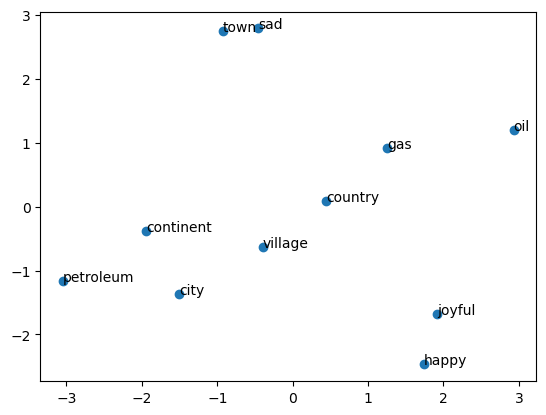

In [51]:
# Assuming X is your data matrix and words is a list of words corresponding to the data points


result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]))
plt.show()